# Pandas: Introduction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

In [2]:
s1 = pd.Series(np.linspace(0, 50, 26, dtype=int), index=np.linspace(0, 50, 26, dtype=int))
s1[:] = s1.index**2 - 1
print(s1, "\n")
s1[:] = np.where((s1.index%3)==0, 0, s1)
print(s1)

0       -1
2        3
4       15
6       35
8       63
10      99
12     143
14     195
16     255
18     323
20     399
22     483
24     575
26     675
28     783
30     899
32    1023
34    1155
36    1295
38    1443
40    1599
42    1763
44    1935
46    2115
48    2303
50    2499
dtype: int64 

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


### Problem 2

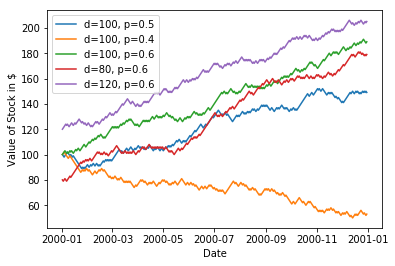

In [3]:
def bernoulli_stock(p, d=100):
    # initialise the series with the initial amount
    s_value = pd.Series(np.full(366, d), index=pd.date_range("1/1/2000", "31/12/2000", freq='D'))
    # steps for daily change
    steps = pd.Series(np.zeros(366), index=pd.date_range("1/1/2000", "31/12/2000", freq='D'))
    # bernoulli distribution from day 2 onwards
    steps[1:] = np.random.binomial(1, p, 365)
    steps[:] = np.where(steps==0, -1, steps)
    steps[0] = 0                             # no change on day 1
    # Update the stock 
    s_value = s_value + steps.cumsum()
    s_value[:] = np.where(s_value<0, 0, s_value)
    return s_value

# set parameter
p = 0.5; d = 100
s_value = bernoulli_stock(p, d)
# Plot the time series of stock value
lbl = "d=" + str(d) + ", p=" + str(p)
plt.plot(s_value, label=lbl)

# next combination
p = 0.4; d = 100
lbl = "d=" + str(d) + ", p=" + str(p)
plt.plot(bernoulli_stock(p, d), label=lbl)

# next combination
p = 0.6; d = 100
lbl = "d=" + str(d) + ", p=" + str(p)
plt.plot(bernoulli_stock(p, d), label=lbl)

# next combination
p = 0.6; d = 80
lbl = "d=" + str(d) + ", p=" + str(p)
plt.plot(bernoulli_stock(p, d), label=lbl)

# next combination
p = 0.6; d = 120
lbl = "d=" + str(d) + ", p=" + str(p)
plt.plot(bernoulli_stock(p, d), label=lbl)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Value of Stock in $")
plt.show()

### Problem 3

In [4]:
# build data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

# Select ID, Name from studentInfo where Age>19 and Sex = 'M'
studentInfo[(studentInfo.Age>19) & (studentInfo.Sex=="M")][["ID", "Name"]]

,ID,Name
0,0,Mylan
6,6,Matt


### Problem 4

In [5]:
pd.merge(studentInfo[studentInfo.Sex=="M"], otherInfo, on="ID", how='inner')[["ID", "Age", "GPA"]]

,ID,Age,GPA
0,0,20,3.8
1,2,18,3.0
2,4,19,2.8
3,6,20,3.8
4,7,19,3.4
